In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from matplotlib import cm 

In [6]:
plt.rcParams.update({'font.size':14})

In [16]:
initial2Dlocations = np.array([
    [9 , 165],
    [7 , 210],
    [6.5 , 260],
    [9 , 310],
    [20, 165],
    [20, 300],
    [25, 210],
    [25, 260],
])

In [41]:
par = {'kappaX':1.2,
       'kappaY':0.9,
       'theta':1,
       'nA':3,
       'nB':3,
       'alpha':10,
       'betaBX':200,
       'betaFX':10.5,
       'betaBY':400,
       'betaFY':10,
       'deltaX':1.,
       'deltaY':0.05,}

def H(x,kappa,theta,N):
    
    prob=np.ones([1,N+1])
    
    for i in range(1,N+1):
        prob[0,i] = prob[0,i-1] * kappa * x  / theta 
    
    total=0
    
    for i in range(N+1):
        total += prob[0,i]
    
    return prob[0][N]/total


def RHS(t,z,par):
    
    x,y  = z
    
    dxdt =  par['betaFX'] + (par['betaBX']-par['betaFX'])*H(x,par['kappaX'],par['theta'],3)-par['deltaX']*x - par['alpha']*x*y
    dydt =  par['betaFY'] + (par['betaBY']-par['betaFY'])*H(x,par['kappaY'],par['theta'],3)-par['deltaY']*y - par['alpha']*x*y
    
    return np.array([dxdt,dydt])



In [44]:
tSpan = np.linspace(0,20,1001)
sol =  solve_ivp(fun=lambda t,z: RHS(t,z,par), t_span=(tSpan[0],tSpan[-1]), y0=(0.0,0.0), t_eval=tSpan, method='LSODA', rtol=1e-5, atol=1e-5)
        

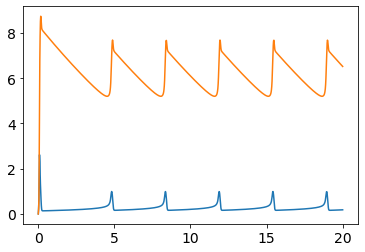

In [45]:
plt.plot(sol.t, sol.y[0,:])
plt.plot(sol.t, sol.y[1,:])